In [1]:
''' I am using a simple Neural Network to determine wether a flower is a Iris Setosa, Iris Versicolor
    or an Iris Virginica based on Sepal Length, Sepal Width, Petal Width, and Petal length input values '''

' I am using a simple Neural Network to determine wether a flower is a Iris Setosa, Iris Versicolor\n    or an Iris Virginica based on Sepal Length, Sepal Width, Petal Width, and Petal length input values '

## Import nessasary modules

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Create the Neural Network Model and Forward Pass

In [34]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
       super().__init__()
       self.fc1 = nn.Linear(in_features, h1)
       self.fc2 = nn.Linear(h1, h2)
       self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))
    
        return x

## Set the random seed and initialize the Model

In [37]:
torch.manual_seed(41)
model = Model()

## Bring in the Iris Data

In [48]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

## Split the data into Training and Test data

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 41) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


## Loss/Error and Optimizer

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train the Iris data

In [94]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    if i %10 == 0:
        print(f'Epoch {i} | Loss {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 | Loss 1.125203251838684
Epoch 10 | Loss 1.0097211599349976
Epoch 20 | Loss 0.8516880869865417
Epoch 30 | Loss 0.6555684804916382
Epoch 40 | Loss 0.45029523968696594
Epoch 50 | Loss 0.27184727787971497
Epoch 60 | Loss 0.15538781881332397
Epoch 70 | Loss 0.0933627262711525
Epoch 80 | Loss 0.06463462114334106
Epoch 90 | Loss 0.05066271498799324


## Graph the training data results

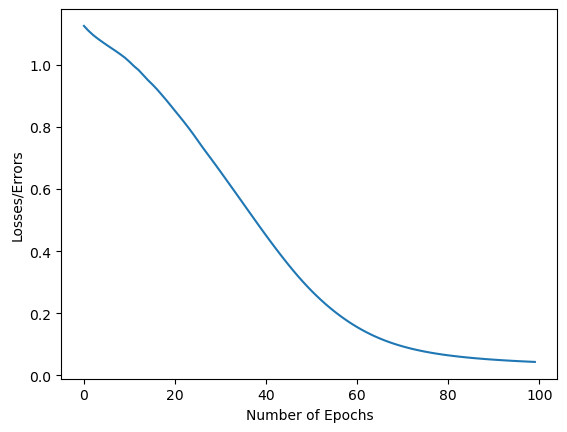

In [103]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)
plt.xlabel('Number of Epochs')
plt.ylabel('Losses/Errors')
plt.show()

## Run the Test Data

In [112]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

loss

tensor(0.1295)

## See how many are correct

In [152]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        print(f'{i}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_train[i]:
            correct += 1
print(f'{correct}/30')
            
        

0. tensor([0.0000, 7.4447, 9.9152]) 	 2 	 2
1. tensor([ 0.0000,  7.7042, 14.3743]) 	 2 	 2
2. tensor([ 0.0000,  9.1280, 15.1753]) 	 2 	 2
3. tensor([0.2102, 8.3280, 4.5364]) 	 1 	 1
4. tensor([ 0.0000,  8.4035, 12.4779]) 	 2 	 2
5. tensor([1.6255, 8.0527, 1.9799]) 	 1 	 1
6. tensor([0.0000, 8.0659, 9.2757]) 	 2 	 2
7. tensor([0.3294, 8.4105, 4.3070]) 	 1 	 1
8. tensor([ 0.0000,  8.2367, 10.8423]) 	 2 	 2
9. tensor([ 0.0000,  8.1941, 15.2505]) 	 2 	 2
10. tensor([0.0000, 7.9806, 8.7350]) 	 2 	 2
11. tensor([8.9715, 3.4637, 0.0000]) 	 0 	 0
12. tensor([8.0554, 3.1741, 0.0000]) 	 0 	 0
13. tensor([2.2377, 6.4805, 0.4353]) 	 1 	 1
14. tensor([8.0202, 3.9148, 0.0000]) 	 0 	 0
15. tensor([0.0000, 8.1254, 8.0101]) 	 2 	 1
16. tensor([8.3626, 3.3009, 0.0000]) 	 0 	 0
17. tensor([0.0000, 7.6349, 9.5548]) 	 1 	 2
18. tensor([8.9383, 3.4532, 0.0000]) 	 0 	 0
19. tensor([7.5003, 3.3025, 0.0000]) 	 0 	 0
20. tensor([1.9760, 7.0980, 1.0766]) 	 1 	 1
21. tensor([ 0.0000,  8.4465, 14.0281]) 	 2 	 2
22

## Testing out our model on New Data

In [165]:
new_data = torch.tensor([2.1, 3.2, 5.1, 4.3])

with torch.no_grad():
    print(model(new_data))

tensor([ 0.0000,  5.5562, 18.9592])
